In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

In [123]:
# https://www.kaggle.com/datasets/wageraldine/data-harga-rumah-jakarta-selatan-csv

# Membaca dataset
df = pd.read_csv('data_harga_rumah_jakarta_selatan.csv')

In [124]:
# Memisahkan kolom gabungan menjadi kolom individu
df[['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA']] = df['HARGA;LT;LB;JKT;JKM;GRS;KOTA'].str.split(';', expand=True)

In [125]:
# Menghapus titik dari kolom 'harga'
df['HARGA'] = df['HARGA'].str.replace('.', '')

In [126]:
# Menghapus kolom 'HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', dan 'KOTA'
df = df.drop(['HARGA;LT;LB;JKT;JKM;GRS;KOTA'], axis=1)

In [127]:
# Menyimpan dataset yang telah diperbarui ke file CSV baru
df.to_csv('data_harga_rumah_jakarta_selatan_updated.csv', index=False)

In [128]:
# Memuat dataset
df = pd.read_csv('data_harga_rumah_jakarta_selatan_updated.csv')

# Menampilkan nama kolom untuk memverifikasi
print(df.columns)

Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA'], dtype='object')


In [129]:
# Konversi Tipe Data Harga
df['HARGA'] = pd.to_numeric(df['HARGA'], errors='coerce')

In [130]:
# Menampilkan beberapa baris pertama dataset
print(df.head())

         HARGA    LT   LB  JKT  JKM  GRS    KOTA
0  28000000000  1100  700    5    6  ADA  JAKSEL
1  19000000000   824  800    4    4  ADA  JAKSEL
2   4700000000   500  400    4    3  ADA  JAKSEL
3   4900000000   251  300    5    4  ADA  JAKSEL
4  28000000000  1340  575    4    5  ADA  JAKSEL


In [131]:
# Menampilkan ringkasan statistik
print(df.describe())

              HARGA           LT            LB          JKT          JKM
count  1.001000e+03  1001.000000   1001.000000  1001.000000  1001.000000
mean   1.747472e+10   530.504496    487.275724     4.457542     3.940060
std    2.079548e+10   531.069773    452.872262     2.004606     1.903261
min    4.300000e+08    22.000000     38.000000     1.000000     1.000000
25%    6.750000e+09   220.000000    300.000000     4.000000     3.000000
50%    1.350000e+10   400.000000    411.000000     4.000000     4.000000
75%    2.000000e+10   677.000000    600.000000     5.000000     4.000000
max    2.500000e+11  6790.000000  10000.000000    27.000000    27.000000


In [132]:
# Memeriksa nilai yang hilang
print(df.isnull().sum())

HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
KOTA     0
dtype: int64


In [26]:
# Mengonversi kolom harga menjadi tipe numerik
#df['HARGA'] = pd.to_numeric(df['HARGA'], errors='coerce')

In [29]:
# Memeriksa nilai NaN dalam kolom harga
#print(df['HARGA'].isnull().sum())

1001


In [30]:
# Menghapus baris dengan nilai NaN dalam kolom harga
#df = df.dropna(subset=['HARGA'])

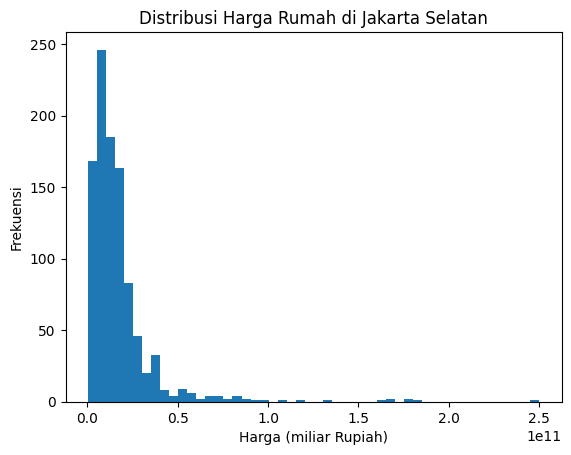

In [133]:
# Visualisasi distribusi harga rumah
plt.hist(df['HARGA'], bins=50)
plt.title('Distribusi Harga Rumah di Jakarta Selatan')
plt.xlabel('Harga (miliar Rupiah)')
plt.ylabel('Frekuensi')
plt.show()

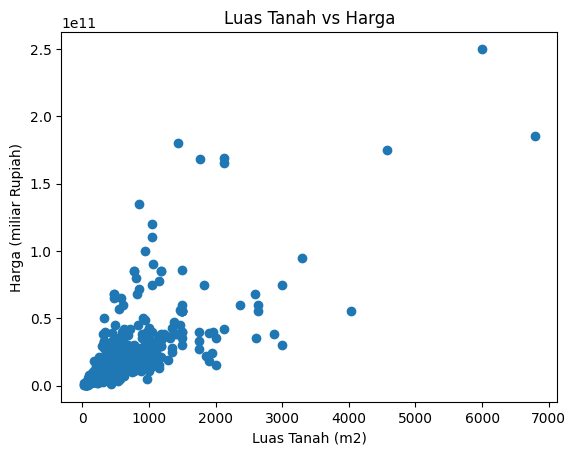

In [134]:
# Visualisasi hubungan antara luas tanah dan harga
plt.scatter(df['LT'], df['HARGA'])
plt.title('Luas Tanah vs Harga')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga (miliar Rupiah)')
plt.show()

In [136]:
# Memilih fitur dan label
X = df[['LT', 'JKT', 'KOTA']]
y = df['HARGA']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Membangun preprocessing pipeline untuk fitur kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['LT', 'JKT']),
        ('cat', OneHotEncoder(), ['KOTA'])
    ])

# Membangun pipeline regresi
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['LT', 'JKT']),
                                                 ('cat', OneHotEncoder(),
                                                  ['KOTA'])])),
                ('regressor', LinearRegression())])

In [138]:
# Memprediksi harga pada set pengujian
y_pred = model.predict(X_test)

In [139]:
# Menghitung Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 5791559186.713335


In [140]:
# Menghitung akurasi model
accuracy = r2_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

Akurasi Model: 30.34%
